In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()
train_data = datasets.MNIST('data',train=True,download=True,transform=transform)
test_data = datasets.MNIST('data',train=False,download=False,transform=transform)


In [3]:
num_workers=0
batch_size=20

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=True,num_workers=num_workers)

# 視覺化一張數字圖

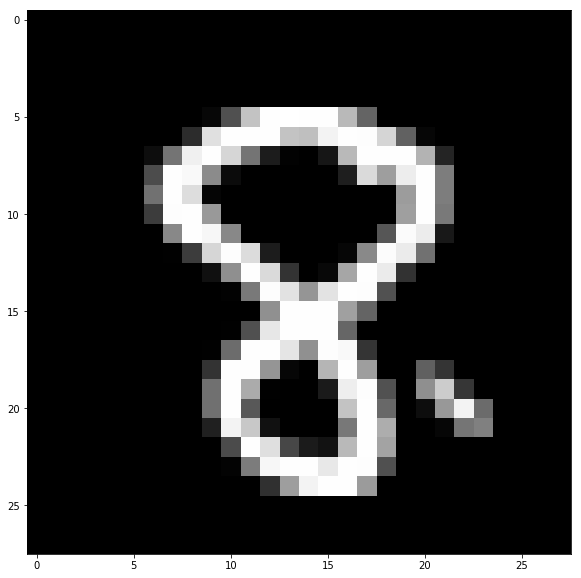

In [4]:
dataiter = iter(train_loader)
imgs,labels = next(dataiter)

imgs = imgs.numpy()
img = np.squeeze(imgs[0])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [6]:
def conv2d(in_channel,out_channel):
    return nn.Conv2d(in_channel,out_channel,3,1,1)
def deconv2d(in_channel,out_channel):
    return nn.ConvTranspose2d(in_channel,out_channel,4,2,1)

In [7]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder,self).__init__()
        # 28*28
        self.conv1 = conv2d(1,16)
        
        # 14*14
        self.conv2 = conv2d(16,4)
        
        #7*7
        self.pool = nn.MaxPool2d(2,2)
        
        #14*14
        self.t_conv1 = deconv2d(4,16)
        self.t_conv2 = deconv2d(16,1)
        
    def forward(self,x):
        # encode
        x = self.pool(F.relu(self.conv1(x)))
        code = self.pool(F.relu(self.conv2(x)))
        #decode
        x = F.relu(self.t_conv1(code))

        x = F.sigmoid(self.t_conv2(x))
        
        return x , code
    
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv2): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)


In [8]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [10]:
epochs = 20
for epoch in range(epochs):
    
    train_loss=0
    for imgs,_ in train_loader:
        
        optimizer.zero_grad()
        out,code = model(imgs)
    
        
        loss = criterion(out,imgs)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()*imgs.size(0)
        
    train_loss = train_loss/len(train_loader)
    print("{}/{} train loss:{:.4f}".format(epoch+1,epochs,train_loss))
        
        

1/20 train loss:0.1423
2/20 train loss:0.1273
3/20 train loss:0.1217
4/20 train loss:0.1171
5/20 train loss:0.1137
6/20 train loss:0.1110
7/20 train loss:0.1087
8/20 train loss:0.1070
9/20 train loss:0.1056
10/20 train loss:0.1045
11/20 train loss:0.1036
12/20 train loss:0.1028
13/20 train loss:0.1021
14/20 train loss:0.1015
15/20 train loss:0.1009
16/20 train loss:0.1003
17/20 train loss:0.0996
18/20 train loss:0.0990
19/20 train loss:0.0984
20/20 train loss:0.0978


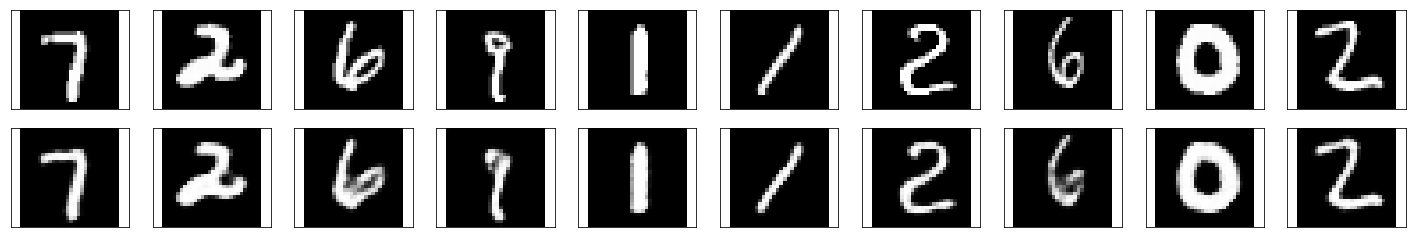

In [20]:

dataiter = iter(test_loader)
images, labels = dataiter.next()


output,_ = model(images)
images = images.numpy()


output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()


fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))


for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)